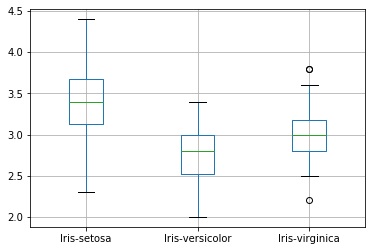

In [211]:
import pandas
import numpy
data = pandas.read_csv("iris.dat.txt", header=None)
SepalWidth = data.iloc[:,1]
ClassLabel = data.iloc[:,4]

newDF = data[[1,4]]

newDF = newDF.pivot( columns=4, values=1)
temp1 = newDF.iloc[:,0]
temp1 = temp1.dropna()
temp2 = newDF.iloc[:,1]
temp2 = temp2.dropna()
temp3 = newDF.iloc[:,2]
temp3 = temp3.dropna()

df = pandas.DataFrame(list(zip(temp1, temp2,temp3)),columns= ["Iris-setosa","Iris-versicolor","Iris-virginica"])
df.boxplot()

In [ ]:

#Hypothesis 1: Sepal Width of Setosa is significantly different than Versicolor
#Hypothesis 2: Sepal Width of Setosa is significantly different than Virginica
#Hypothesis 3: Sepal Width of Versicolor is significantly different than Virginica


In [212]:
import pandas
from scipy import stats
def two_sample_paired_t_test1(filename):
    resultList = []
#     Iris-setosa 	Iris-versicolor 	Iris-virginica
    column1 = df["Iris-setosa"]
    column2 = df["Iris-virginica"]

    resultPaired = stats.ttest_rel(column1,column2)
    pVal1 = resultPaired[1]
    resultList.append(float(pVal1))
    if pVal1>0.1:
        resultList.append("accept")
    else:
        resultList.append("reject")    
               
    return(tuple(resultList))

result1 = two_sample_paired_t_test1("iris.dat.txt")


In [213]:
result1
print("Alpha = 0.1: Since the p value obtained from the t-test is "+ str(result1[0])+ ", thus we "+ result1[1]+" the hypothesis.")

Alpha = 0.1: Since the p value obtained from the t-test is 8.783585025401306e-08, thus we reject the hypothesis.


In [214]:
def two_sample_paired_t_test2(filename):
    resultList = []
    column1 = df["Iris-versicolor"]
    column2 = df["Iris-virginica"]

    resultPaired = stats.ttest_rel(column1,column2)
    pVal1 = resultPaired[1]
    resultList.append(float(pVal1))
    if pVal1>0.1:
        resultList.append("accept")
    else:
        resultList.append("reject")    
               
    return(tuple(resultList))

result2 = two_sample_paired_t_test2("iris.dat.txt")

In [215]:
result2
print("Alpha = 0.1: Since the p value obtained from the t-test is "+ str(result2[0])+ ", thus we "+ result2[1]+" the hypothesis.")

Alpha = 0.1: Since the p value obtained from the t-test is 0.0034322095632924993, thus we reject the hypothesis.


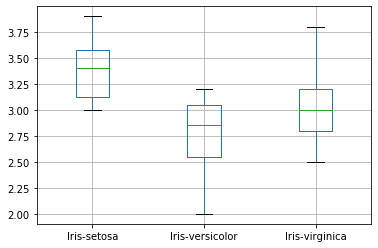

In [216]:
temp1 = pandas.DataFrame(df["Iris-setosa"].sample(n=10, replace=True, random_state = 99))
temp2 = pandas.DataFrame(df["Iris-versicolor"].sample(n=10, replace=True, random_state = 68))
temp3 = pandas.DataFrame(df["Iris-virginica"].sample(n=10, replace=True, random_state = 25))
temp1 = temp1.reset_index(drop=True)
temp2 = temp2.reset_index(drop=True)
temp3 = temp3.reset_index(drop=True)
sample = temp1.join(temp2).join(temp3)
# new = df.append(sample).reset_index(drop=True)
sample.boxplot()

In [ ]:
#Classes 1 vs 3 hypothesis would still be rejected
#Classes 2 vs 3 hypothesis would be accepted

In [217]:
def two_sample_paired_t_test1Resampled(filename):
    resultList = []
    column1 = sample["Iris-setosa"]
    column2 = sample["Iris-virginica"]

    resultPaired = stats.ttest_rel(column1,column2)
    pVal1 = resultPaired[1]
    resultList.append(float(pVal1))
    if pVal1>0.1:
        resultList.append("accept")
    else:
        resultList.append("reject")    
               
    return(tuple(resultList))

result1 = two_sample_paired_t_test1Resampled("iris.dat.txt")


In [218]:
def two_sample_paired_t_test2Resampled(filename):
    resultList = []
    column1 = sample["Iris-versicolor"]
    column2 = sample["Iris-virginica"]

    resultPaired = stats.ttest_rel(column1,column2)
    pVal1 = resultPaired[1]
    resultList.append(float(pVal1))
    if pVal1>0.1:
        resultList.append("accept")
    else:
        resultList.append("reject")    
               
    return(tuple(resultList))

result2 = two_sample_paired_t_test2Resampled("iris.dat.txt")


In [219]:
result1
print("Alpha = 0.1: Since the p value obtained from the t-test is "+ str(result1[0])+ ", thus we "+ result1[1]+" the hypothesis.")

Alpha = 0.1: Since the p value obtained from the t-test is 0.06256803336937534, thus we reject the hypothesis.


In [220]:
result2
print("Alpha = 0.1: Since the p value obtained from the t-test is "+ str(result2[0])+ ", thus we "+ result2[1]+" the hypothesis.")

Alpha = 0.1: Since the p value obtained from the t-test is 0.14907377489601573, thus we accept the hypothesis.


In [221]:
alpha = 0.1
stderr = 1-(1-alpha)**4

In [222]:
print("The propability that I made at least one error in the set of hypothesis tests is: " + str(stderr))

The propability that I made at least one error in the set of hypothesis tests is: 0.3439
